In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [1]:
Gold = pd.read_csv('/home/tumich/Desktop/portfolio/Gold.csv')
BTC = pd.read_csv('/home/tumich/Desktop/portfolio/btc.csv')
SC = pd.read_csv('/home/tumich/Desktop/portfolio/sc.csv')

In [3]:
Gold['Date'] = pd.to_datetime(Gold['Date'], utc=True)
Gold.set_index('Date',inplace=True)

In [4]:
Gold = Gold.drop(columns=['Open','High','Low','Close','Volume'])

In [5]:
Gold.columns = ['Price']

In [6]:
Gold = Gold.loc['2015-09-15':'2020-09-15']

In [7]:
Gold = Gold.fillna(method='bfill')

In [11]:
gold_q = Gold.to_csv('gold_q.csv')

In [9]:
BTC = BTC.drop(columns=['market_cap','total_volume'])

In [10]:
BTC.columns = ['Date','Price']

In [11]:
BTC['Date'] = pd.to_datetime(BTC['Date'], utc=True)
BTC.set_index('Date',inplace=True)

In [12]:
BTC = BTC.loc['2019-09-15':'2020-09-15']

In [13]:
SC = SC.drop(columns=['market_cap','total_volume'])

In [14]:
SC.columns = ['Date','Price']

In [15]:
SC['Date'] = pd.to_datetime(SC['Date'], utc=True)
SC.set_index('Date',inplace=True)

In [16]:
SC = SC.loc['2019-09-15':'2020-09-15']

In [17]:
Gold = Gold.fillna(method='bfill')
BTC = BTC.fillna(method='ffill')
SC = SC.fillna(method='ffill')

In [18]:
for assets in (Gold,BTC,SC):
    assets['Normed Return'] = assets['Price']/assets.iloc[0]['Price']

In [19]:
for assets, allo in zip((Gold,BTC,SC),[.33,.33,.34]):
    assets['Allocation'] = assets['Normed Return']*allo

In [20]:
for assets in (Gold,BTC,SC):
    assets['Position Values'] = assets['Allocation']*10000

In [21]:
all_pos_vals = [Gold['Position Values'],BTC['Position Values'],SC['Position Values']]

portfolio_val = pd.concat(all_pos_vals,axis=1)

In [22]:
portfolio_val.columns = ['Gold Value','BTC Value','SC Value']

In [23]:
portfolio_val = portfolio_val.fillna(method='ffill')

In [24]:
portfolio_val['Total Value'] = portfolio_val.sum(axis=1)

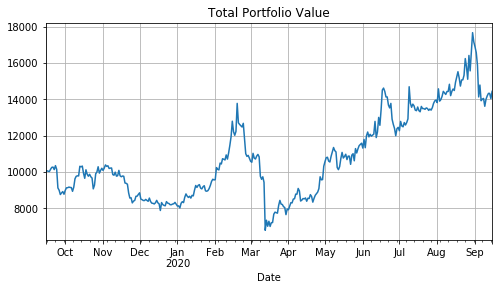

In [25]:
portfolio_val['Total Value'].plot(figsize=(8,4),grid=True)
plt.title('Total Portfolio Value');

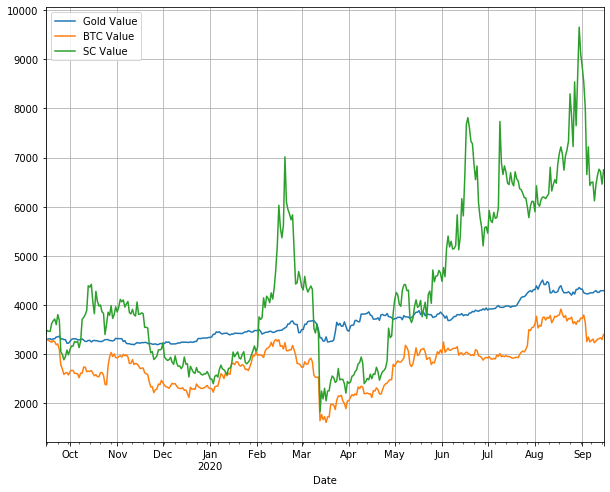

In [26]:
portfolio_val.drop('Total Value',axis=1).plot(figsize=(10,8),grid=True);

In [27]:
portfolio_val['Daily Return'] = portfolio_val['Total Value'].pct_change(1)

In [28]:
portfolio_val['Daily Return'].mean()

0.001604226436029073

In [29]:
portfolio_val['Daily Return'].std()

0.034021690616575034

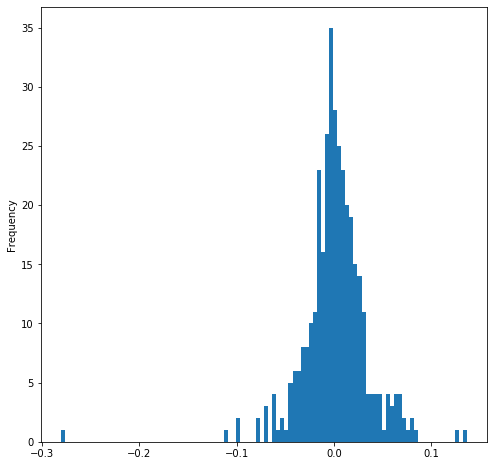

In [30]:
portfolio_val['Daily Return'].plot(kind='hist',bins=100,figsize=(8,8));

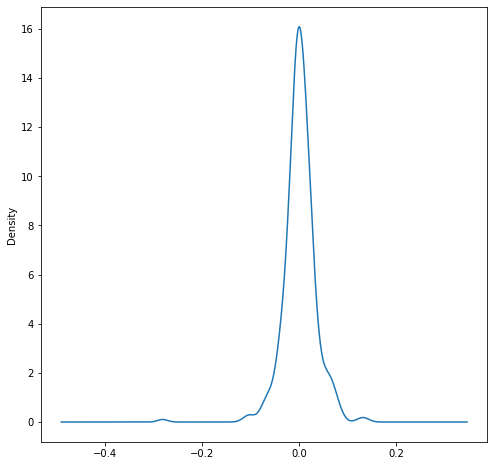

In [31]:
portfolio_val['Daily Return'].plot(kind='kde',figsize=(8,8));

In [32]:
total_return = 100*(portfolio_val['Total Value'][-1]/portfolio_val['Total Value'][0]-1)

In [33]:
total_return

44.36783313562338

In [34]:
portfolio_val['Total Value'][-1]

14436.783313562339

In [35]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [36]:
SR

0.047153048744953005

In [37]:
ASR = (365**0.5)*SR

In [38]:
ASR

0.9008577313702362